In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-09 11:49:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1,41M  8,51MB/s    in 0,2s    

2023-10-09 11:49:58 (8,51 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [117]:
import numpy as np
import pandas as pd

In [118]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [119]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [120]:
df = df[['make','model','year','engine_hp','engine_cylinders','transmission_type','vehicle_style','highway_mpg','city_mpg','msrp']]
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [121]:
df.fillna(0, inplace=True)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [122]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [123]:
df['above_average'] = (df.msrp >= df.msrp.mean()).astype(int)
df.head(3)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0


In [124]:
del df['msrp']

In [130]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [131]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [132]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [133]:
len(df_train), len(df_val), len(df_test), len(y_train), len(y_val), len(y_test)

(7148, 2383, 2383, 7148, 2383, 2383)

#### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

    For each numerical variable, use it as score and compute AUC with the above_average variable
    Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?
- engine_hp
- engine_cylinders
- highway_mpg
- city_mpg

In [81]:
numerical = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [82]:
from sklearn.metrics import roc_auc_score

for column in numerical:
    auc_score = roc_auc_score(y_train, df_train[column])
    roc_auc_score_data = roc_auc_score(y_train, df_train[column])
    print(column, roc_auc_score_data)

engine_hp 0.9171031265539011
engine_cylinders 0.766116490165669
highway_mpg 0.3669412128227987
city_mpg 0.3265755356754767


Question 1 answer: engine_hp

#### Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)
- 0.678
- 0.779
- 0.878
- 0.979

In [83]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dv = DictVectorizer(sparse=False)

In [84]:
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
score = roc_auc_score(y_val, y_pred)
round(score, 3)

0.976

Question 2 answer 0.979

#### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

    Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
    For each threshold, compute precision and recall
    Plot them

At which threshold precision and recall curves intersect?
- 0.28
- 0.48
- 0.68
- 0.88

In [91]:
from sklearn.metrics import precision_score, recall_score

In [92]:
precisions = []
recalls = []
thresholds = np.arange(0, 1, 0.01)

In [93]:
for t in thresholds:
  score = y_pred >= t
  prec_score = precision_score(y_val, score)
  rec_score = recall_score(y_val, score)
  precisions.append(prec_score)
  recalls.append(rec_score)

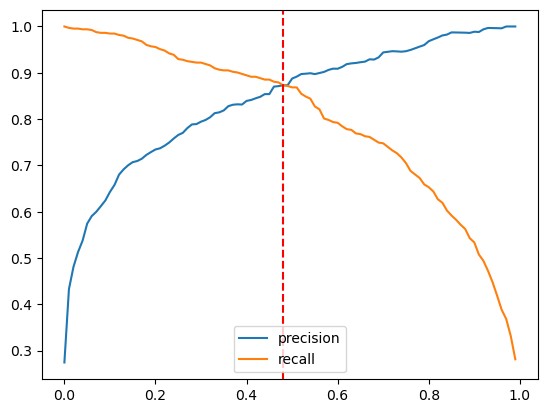

In [94]:
plt.plot(thresholds, precisions, label='precision')
plt.plot(thresholds, recalls, label='recall')
plt.axvline(0.48, color='r', linestyle= '--')
plt.legend()
plt.show()

Question 3 answer 0.48

#### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

Where is precision and

is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- 0.52
- 0.72


In [97]:
f1_score = []
for i in range(len(precisions)):
    f1 = 2 * precisions[i]* recalls[i] / ( precisions[i] + recalls[i])
    f1_score.append(f1)
    
thresholds[np.argmax(f1_score)]

0.51

Question 4 answer 0.52

#### Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

    Iterate over different folds of df_full_train
    Split the data into train and validation
    Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?
- 0.003
- 0.030
- 0.090
- 0.140

In [134]:
from sklearn.model_selection import KFold

In [135]:
KFold= KFold(n_splits=5, shuffle=True, random_state=1)

In [137]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [140]:
auc_scores = []

for train_index, val_index in KFold.split(df_full_train):
    
    df_train, df_val = df_full_train.iloc[train_index], df_full_train.iloc[val_index]
    
    y_train = df_train.above_average.values
    y_val = df_val.above_average.values
    
    del df_train['above_average']
    del df_val['above_average']
    
    X_train = dv.fit_transform(df_train.to_dict(orient='records'))
    X_val = dv.transform(df_val.to_dict(orient='records'))
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, y_pred)

    auc_scores.append(score)

In [147]:
round(np.std(auc_scores), 3)

0.003

Quastion 5 answer 0.003

#### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C

    Iterate over the following C values: [0.01, 0.1, 0.5, 10]
    Initialize KFold with the same parameters as previously
    Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?
- 0.01
- 0.1
- 0.5
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [156]:
from sklearn.model_selection import KFold

KFold= KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    auc_scores = []
    for train_index, val_index in KFold.split(df_full_train):
    
        df_train, df_val = df_full_train.iloc[train_index], df_full_train.iloc[val_index]
    
        y_train = df_train.above_average.values
        y_val = df_val.above_average.values
    
        del df_train['above_average']
        del df_val['above_average']
    
        X_train = dv.fit_transform(df_train.to_dict(orient='records'))
        X_val = dv.transform(df_val.to_dict(orient='records'))
    
        model.fit(X_train, y_train)
    
        y_pred = model.predict_proba(X_val)[:, 1]
        score = roc_auc_score(y_val, y_pred)

        auc_scores.append(score)
        
    print(C, round(np.mean(auc_scores), 3), round(np.std(auc_scores), 3))

0.01 0.952 0.002
0.1 0.972 0.002
0.5 0.978 0.001
10 0.982 0.003


Question 6 answer 10.